In [1]:
# Importing the necessary packages
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Download and load the dataset
train_dataset = datasets.MNIST(root = './data', train = True, download = True)
test_dataset = datasets.MNIST(root = './data', train = False, download = True)

In [3]:
train_len = len(train_dataset)
test_len = len(test_dataset)

print(f"Length of the Training dataset: {train_len}")
print(f"Length of the Testing dataset: {test_len}")

Length of the Training dataset: 60000
Length of the Testing dataset: 10000


In [4]:
# Plotting the image from the training dataset
def plot_img(idx):
    # Getting the image and label
    image, label = train_dataset[idx]

    # Plotting the image using the `imshow` function from the matplotlib
    plt.imshow(image, cmap = "gray")

    # printing the label
    print(f"Image Label: {label}")

Image Label: 5


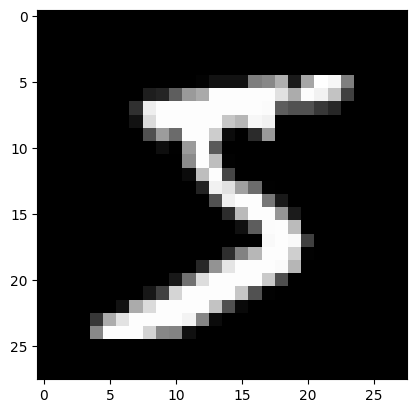

In [5]:
# Plotting the 1st image
plot_img(idx = 0)

Image Label: 3


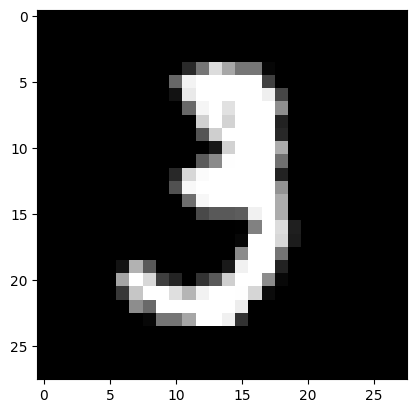

In [6]:
# Plotting the 11th image
plot_img(idx = 10)

PyTorch model's are used on Tensors rather than the numpy data type.

Thus, the we have to change the data type of the image to tensor during the download process, by using `transforms.ToTensor()`.

In [7]:
# There is no need to download the dataset again as it is already downloaded
dataset = datasets.MNIST(root = "./data",
                         train = True,
                         transform = transforms.ToTensor())

In [8]:
img_tensor, label = dataset[0]
print(f"Shape of the Image: {img_tensor.shape}")
print(f"Label for the image: {label}")

Shape of the Image: torch.Size([1, 28, 28])
Label for the image: 5


In [9]:
# Printing a portion of the image
print(img_tensor[0, 10:15, 10:15])

# Printing the maximum and minimum values in the tensor
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


It can be seen that the tensors are between 0 and 1.

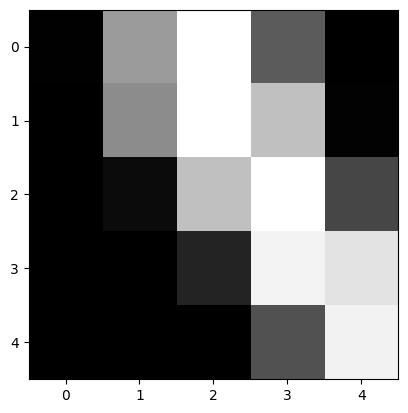

In [10]:
# Plotting a portion of the image
plt.imshow(img_tensor[0, 10:15, 10:15], cmap = "gray")

##### Training and Validation Datasets

It is a good practice to split the data into 3 different datasets:
- Training Dataset
- Validation Dataset
- Testing Dataset

There must be no training on the test dataset.

In [11]:
# Splitin the dataset into training and validation
train_ds, val_ds = random_split(dataset, [50_000, 10_000])

print(f"Size of the new Training Dataset: {len(train_ds)}")
print(f"Size of the Validation Dataset: {len(val_ds)}")

Size of the new Training Dataset: 50000
Size of the Validation Dataset: 10000


Now, defining DataLoader for training and validation datasets

In [12]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size = batch_size, shuffle = True)
val_loader = DataLoader(val_ds, batch_size = batch_size)

##### Model

In [13]:
# HyperParameters for the model
input_size = 28 * 28
num_classes = 10

# Logistic Regression Model
model = nn.Linear(input_size, num_classes)

In [14]:
print(f"Shape of the weights in the model: {model.weight.shape}")
model.weight

Shape of the weights in the model: torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0003,  0.0112, -0.0067,  ...,  0.0079,  0.0026,  0.0172],
        [-0.0304,  0.0352, -0.0194,  ...,  0.0003, -0.0127, -0.0218],
        [-0.0039, -0.0304,  0.0154,  ..., -0.0223,  0.0332,  0.0190],
        ...,
        [ 0.0187,  0.0129,  0.0182,  ...,  0.0117, -0.0305,  0.0119],
        [ 0.0216, -0.0183, -0.0118,  ...,  0.0254,  0.0342, -0.0271],
        [-0.0171,  0.0339,  0.0321,  ...,  0.0199,  0.0140, -0.0051]],
       requires_grad=True)

In [15]:
print(f"Shapew of the bias in the model: {model.bias.shape}")
model.bias

Shapew of the bias in the model: torch.Size([10])


Parameter containing:
tensor([-0.0218, -0.0235,  0.0130, -0.0319, -0.0025,  0.0127,  0.0121, -0.0237,
         0.0043, -0.0038], requires_grad=True)

In [16]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([5, 7, 1, 3, 8, 3, 6, 1, 1, 5, 8, 4, 6, 7, 6, 3, 0, 1, 0, 6, 2, 0, 0, 8,
        2, 3, 0, 1, 1, 0, 2, 0, 1, 1, 3, 1, 6, 2, 9, 1, 7, 7, 8, 5, 9, 1, 1, 9,
        8, 5, 2, 6, 8, 2, 6, 8, 1, 2, 7, 5, 0, 0, 9, 2, 1, 9, 7, 0, 6, 4, 4, 2,
        9, 8, 1, 3, 8, 6, 3, 4, 2, 3, 3, 3, 7, 7, 6, 4, 0, 8, 1, 1, 8, 6, 5, 7,
        6, 4, 3, 0, 1, 4, 4, 7, 6, 7, 2, 7, 9, 8, 2, 3, 9, 3, 3, 9, 2, 6, 3, 7,
        5, 1, 3, 0, 2, 5, 4, 7])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

Here, we are getting an error because the shape of the weights and input tensors are different. To resolve this we have to flatten the input tensors.

In [17]:
images.shape

torch.Size([128, 1, 28, 28])

In [18]:
images.reshape(128, 784).shape

torch.Size([128, 784])

Defining a model using the `nn.Module`.

In [19]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()

        # Initialising a Linear layer
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):

        # (128, 1, 28, 28) -> (128, 28*28)
        xb = xb.reshape(-1, 28 * 28)

        # (128, 28*28) -> (128, 10)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [20]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [21]:
print(f"Shape of the weights is {model.linear.weight.shape} and bias is {model.linear.bias.shape}.")

list(model.parameters())

Shape of the weights is torch.Size([10, 784]) and bias is torch.Size([10]).


[Parameter containing:
 tensor([[-0.0326, -0.0039,  0.0347,  ..., -0.0068,  0.0269,  0.0286],
         [-0.0182, -0.0111, -0.0015,  ..., -0.0222,  0.0225,  0.0329],
         [ 0.0014,  0.0352,  0.0283,  ...,  0.0132,  0.0220,  0.0131],
         ...,
         [-0.0054, -0.0009, -0.0155,  ..., -0.0106,  0.0221,  0.0069],
         [ 0.0097, -0.0099,  0.0307,  ..., -0.0167,  0.0279, -0.0161],
         [-0.0128,  0.0077, -0.0143,  ..., -0.0289,  0.0130, -0.0326]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0213, -0.0186, -0.0159, -0.0015, -0.0168,  0.0301,  0.0234,  0.0311,
         -0.0152,  0.0201], requires_grad=True)]

In [22]:
# Making predictions for the first batch of the images
for images, labels in train_loader:
    outputs = model(images)
    break

print("Output.shape: ", outputs.shape)
print("Sample Outputs: ", outputs[:2].data)

Output.shape:  torch.Size([128, 10])
Sample Outputs:  tensor([[ 0.1908,  0.0241, -0.0554,  0.0748, -0.0475, -0.0593, -0.0501, -0.0712,
          0.0733,  0.1020],
        [-0.0586,  0.0764, -0.2996, -0.2308, -0.0309,  0.2194,  0.1994,  0.0212,
          0.2597, -0.2022]])


`Output.shape:  torch.Size([128, 10])`: this means that we got 10 predictions for each images.

The predictions are mix of positive and negative numbers. To make all the predictions positive, we will use `F.softmax` function.

In [23]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim = 1)

print("Sample Probabilities: \n", probs[:2].data)

print("Sum: ", torch.sum(probs[0]).item())

Sample Probabilities: 
 tensor([[0.1184, 0.1002, 0.0926, 0.1054, 0.0933, 0.0922, 0.0931, 0.0911, 0.1053,
         0.1083],
        [0.0931, 0.1066, 0.0732, 0.0784, 0.0957, 0.1230, 0.1205, 0.1009, 0.1280,
         0.0807]])
Sum:  0.9999999403953552


The total sum of a single image predictions is equal to `1`.

In [24]:
# Now, by using the torch.max we will be getting the highest probability out of all for a single image, and that will become our final output.
max_probs, preds = torch.max(probs, dim = 1)
print(preds)
print(max_probs)

tensor([0, 8, 3, 7, 8, 3, 1, 4, 1, 4, 9, 1, 6, 8, 3, 9, 9, 7, 3, 6, 3, 1, 8, 3,
        6, 9, 4, 9, 0, 9, 3, 9, 3, 3, 0, 3, 1, 5, 7, 1, 8, 8, 3, 1, 9, 3, 3, 1,
        3, 3, 4, 0, 6, 9, 6, 7, 9, 8, 1, 4, 3, 3, 9, 6, 1, 5, 8, 8, 1, 3, 9, 5,
        3, 4, 1, 6, 5, 3, 0, 9, 4, 8, 4, 4, 0, 3, 8, 3, 1, 3, 1, 1, 3, 4, 1, 5,
        3, 7, 5, 9, 1, 1, 7, 5, 1, 4, 3, 3, 3, 8, 4, 9, 3, 9, 7, 6, 3, 0, 3, 8,
        3, 5, 9, 0, 3, 3, 0, 5])
tensor([0.1184, 0.1280, 0.1551, 0.1243, 0.1230, 0.1525, 0.1278, 0.1177, 0.1132,
        0.1296, 0.1285, 0.1112, 0.1243, 0.1149, 0.1204, 0.1156, 0.1283, 0.1219,
        0.1320, 0.1255, 0.1694, 0.1298, 0.1373, 0.1274, 0.1174, 0.1207, 0.1301,
        0.1083, 0.1199, 0.1103, 0.1503, 0.1155, 0.1288, 0.1174, 0.1204, 0.1442,
        0.1232, 0.1533, 0.1193, 0.1301, 0.1463, 0.1145, 0.1251, 0.1204, 0.1246,
        0.1256, 0.1352, 0.1183, 0.1208, 0.1241, 0.1336, 0.1390, 0.1164, 0.1345,
        0.1382, 0.1257, 0.1395, 0.1189, 0.1293, 0.1211, 0.1459, 0.1361, 0.1251,
       

##### Evaluation Metric and Loss function

In [ ]:
def accuracy(outputs, labels):
    # Get the predicted class by finding the index of the maximum value along dimension 1
    _, preds = torch.max(outputs, dim = 1)
    
    # Calculate the accuracy by comparing predictions with labels, summing correct predictions,
    # and dividing by the total number of predictions
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [26]:
accuracy(outputs, labels)

tensor(0.0547)

In [27]:
loss_fn = F.cross_entropy

In [28]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3430, grad_fn=<NllLossBackward0>)


##### Training the Model

In [ ]:
def evaluate(model, val_loader):
    # Perform the validation step for each batch in the validation loader
    outputs = [model.validation_step(batch) for batch in val_loader]
    
    # Aggregate and process the validation results from all batches
    return model.validation_epoch_end(outputs)

In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_fn = torch.optim.SGD):
    # Initialize the optimizer with the model's parameters and learning rate
    optimizer = opt_fn(model.parameters(), lr = lr)
    history = []  # List to store validation results for each epoch

    for epoch in range(epochs):

        # Training Phase
        for batch in train_loader:
            # Perform a single training step for the current batch
            loss = model.training_step(batch)
            loss.backward()  # Backpropagate the loss
            optimizer.step()  # Update the model parameters
            optimizer.zero_grad()  # Reset gradients for the next iteration

        # Validation Phase
        result = evaluate(model, val_loader)  # Evaluate the model on the validation set
        model.epoch_end(epoch, result)  # Log or print the results of the current epoch
        history.append(result)  # Save the validation result for this epoch

    return history  # Return the training history

Redefined version of the model class.

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Define a single linear layer to map input features to class scores
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        # Reshape the input tensor to flatten the 28x28 images into 784-dimensional vectors
        xb = xb.reshape(-1, 28*28)
        # Pass the input through the linear layer
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        # Extract images and labels from the training batch
        images, labels = batch
        # Compute the model's output for the images
        out = self(images)
        # Calculate the cross-entropy loss
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        # Extract images and labels from the validation batch
        images, labels = batch
        # Compute the model's output for the images
        out = self(images)
        # Calculate the cross-entropy loss
        loss = F.cross_entropy(out, labels)
        # Calculate the accuracy using the accuracy function
        acc = accuracy(out, labels)
        # Return a dictionary with validation loss and accuracy
        return {"val_loss": loss, "val_acc": acc}

    def validation_epoch_end(self, outputs):
        # Collect all validation losses from the batches
        batch_losses = [x["val_loss"] for x in outputs]
        # Compute the mean loss for the epoch
        epoch_loss = torch.stack(batch_losses).mean()
        # Collect all validation accuracies from the batches
        batch_accs = [x["val_acc"] for x in outputs]
        # Compute the mean accuracy for the epoch
        batch_acc = torch.stack(batch_accs).mean()
        # Return a dictionary with the epoch loss and accuracy
        return {"val_loss": epoch_loss.item(), "val_acc": batch_acc.item()}

    def epoch_end(self, epoch, result):
        # Print the results for the current epoch
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result["val_loss"], result["val_acc"]))

In [36]:
model = MnistModel()

Evaluating the model with random parameters.

In [37]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.321194648742676, 'val_acc': 0.07644382864236832}

In [38]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9520, val_acc: 0.6205
Epoch [1], val_loss: 1.6797, val_acc: 0.7246
Epoch [2], val_loss: 1.4766, val_acc: 0.7628
Epoch [3], val_loss: 1.3236, val_acc: 0.7861
Epoch [4], val_loss: 1.2060, val_acc: 0.8016


In [39]:
history2 = fit(10, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1138, val_acc: 0.8129
Epoch [1], val_loss: 1.0398, val_acc: 0.8202
Epoch [2], val_loss: 0.9792, val_acc: 0.8259
Epoch [3], val_loss: 0.9290, val_acc: 0.8306
Epoch [4], val_loss: 0.8864, val_acc: 0.8347
Epoch [5], val_loss: 0.8501, val_acc: 0.8387
Epoch [6], val_loss: 0.8185, val_acc: 0.8422
Epoch [7], val_loss: 0.7910, val_acc: 0.8446
Epoch [8], val_loss: 0.7667, val_acc: 0.8473
Epoch [9], val_loss: 0.7450, val_acc: 0.8498


In [40]:
history3 = fit(5, 0.002, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7081, val_acc: 0.8532
Epoch [1], val_loss: 0.6777, val_acc: 0.8567
Epoch [2], val_loss: 0.6522, val_acc: 0.8593
Epoch [3], val_loss: 0.6305, val_acc: 0.8617
Epoch [4], val_loss: 0.6117, val_acc: 0.8648


In [41]:
history4 = fit(10, 0.002, model, train_loader, val_loader)

Epoch [0], val_loss: 0.5952, val_acc: 0.8665
Epoch [1], val_loss: 0.5807, val_acc: 0.8687
Epoch [2], val_loss: 0.5678, val_acc: 0.8699
Epoch [3], val_loss: 0.5562, val_acc: 0.8714
Epoch [4], val_loss: 0.5457, val_acc: 0.8731
Epoch [5], val_loss: 0.5362, val_acc: 0.8752
Epoch [6], val_loss: 0.5274, val_acc: 0.8762
Epoch [7], val_loss: 0.5194, val_acc: 0.8768
Epoch [8], val_loss: 0.5120, val_acc: 0.8775
Epoch [9], val_loss: 0.5052, val_acc: 0.8785


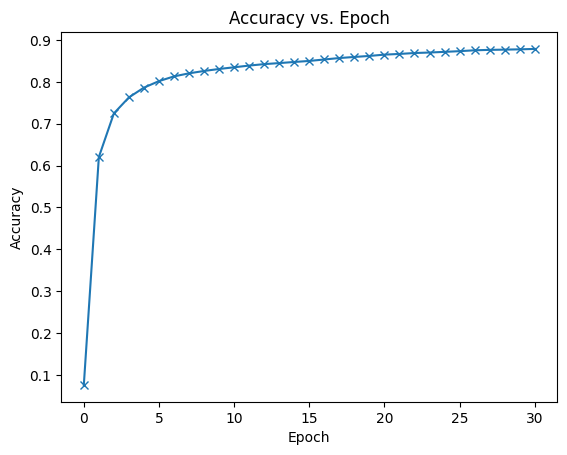

In [ ]:
# Combine results from multiple histories into a single list
history = [result0] + history1 + history2 + history3 + history4

# Extract validation accuracies from the history
accuracies = [result["val_acc"] for result in history]

# Plot the validation accuracies over epochs
plt.plot(accuracies, "-x")  # Use a line with markers to show the trend
plt.xlabel("Epoch")         # Label for the x-axis
plt.ylabel("Accuracy")      # Label for the y-axis
plt.title("Accuracy vs. Epoch")  # Title of the plot
plt.show()                  # Display the plot

##### Now, testing the model on the unseen images

In [43]:
test_dataset = datasets.MNIST(root = "data/",
                              train = False,
                              transform = transforms.ToTensor())

Shape:  torch.Size([1, 28, 28])
Label:  7


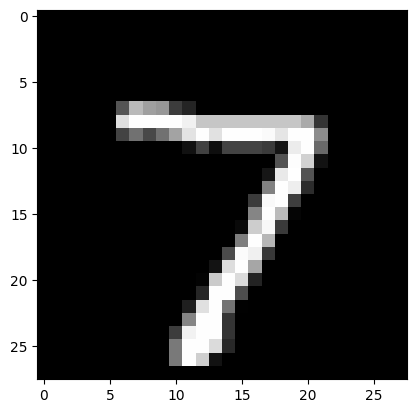

In [44]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = "gray")
print("Shape: ", img.shape)
print("Label: ", label)

In [47]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim = 1)
    return preds[0].item()

Label:  7 , Predicted:  7


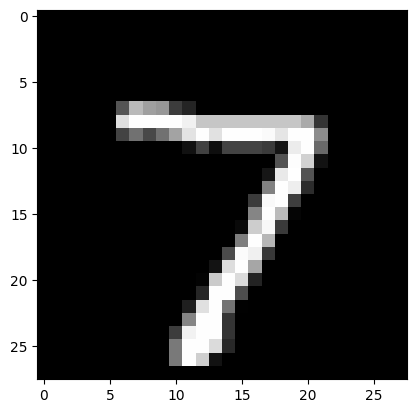

In [48]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = "gray")
print("Label: ", label, ", Predicted: ", predict_image(img, model))

Label:  0 , Predicted:  0


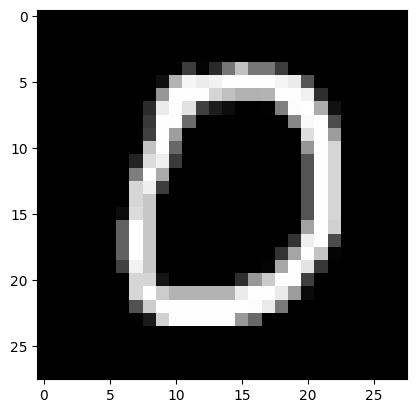

In [50]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap = "gray")
print("Label: ", label, ", Predicted: ", predict_image(img, model))

Label:  6 , Predicted:  6


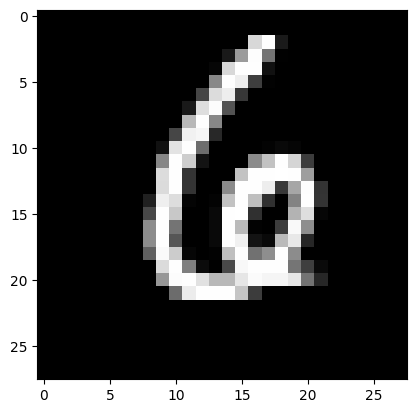

In [51]:
img, label = test_dataset[123]
plt.imshow(img[0], cmap = "gray")
print("Label: ", label, ", Predicted: ", predict_image(img, model))

Label:  9 , Predicted:  3


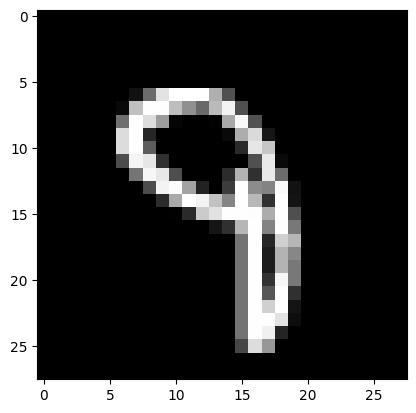

In [52]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap = "gray")
print("Label: ", label, ", Predicted: ", predict_image(img, model))

In [53]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.4824333190917969, 'val_acc': 0.8818359375}

##### Saving and Loading the model

In [54]:
torch.save(model.state_dict(), "mnist-logistic.pth")

In [55]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0023,  0.0331, -0.0228,  ..., -0.0355,  0.0139, -0.0298],
                      [ 0.0214,  0.0141, -0.0200,  ...,  0.0008, -0.0013,  0.0315],
                      [ 0.0274,  0.0317,  0.0016,  ...,  0.0332,  0.0259, -0.0212],
                      ...,
                      [ 0.0188,  0.0154, -0.0154,  ..., -0.0237,  0.0221,  0.0132],
                      [-0.0301,  0.0183, -0.0017,  ..., -0.0264, -0.0081,  0.0165],
                      [ 0.0270,  0.0274, -0.0249,  ...,  0.0262,  0.0297, -0.0285]])),
             ('linear.bias',
              tensor([-0.0469,  0.1015, -0.0136, -0.0298,  0.0412,  0.1222, -0.0323,  0.1068,
                      -0.1556, -0.0172]))])

To load the model, first we should provide the structure of the model, this can be done by initialising the model and then loading the parameters on the model.

In [56]:
model2 = MnistModel()
model2.load_state_dict(torch.load("mnist-logistic.pth"))

<All keys matched successfully>

In [57]:
result2 = evaluate(model2, test_loader)
result2

{'val_loss': 0.4824333190917969, 'val_acc': 0.8818359375}